In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
import matplotlib.pyplot as plt  
from scipy.stats import norm
import datetime
%matplotlib inline

In [ ]:
start = datetime.datetime(2017,1,1)
end = datetime.dow()
data = wb.DataReader("AMZN","morningstar",start,end)
ticker = 'AMZN' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='morningstar',end)['Close']
data[ticker]

In [31]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()
data = web.DataReader("AMZN", 'morningstar', start, end)
data.reset_index(inplace=True)
data.set_index("Date", inplace=True)
data = data.drop("Symbol", axis=1)
pandaclose = pd.DataFrame(data['Close'])
pandaclose

,Close
Date,
2018-01-01,1169.47
2018-01-02,1189.01
2018-01-03,1204.20
2018-01-04,1209.59
2018-01-05,1229.14
2018-01-08,1246.87
2018-01-09,1252.70
2018-01-10,1254.33
2018-01-11,1276.68


In [32]:
log_returns = np.log(1 + pandaclose.pct_change())
log_returns.tail()

,Close
Date,
2018-07-02,0.008191
2018-07-03,-0.011632
2018-07-04,0.000000
2018-07-05,0.003400
2018-07-06,0.006392


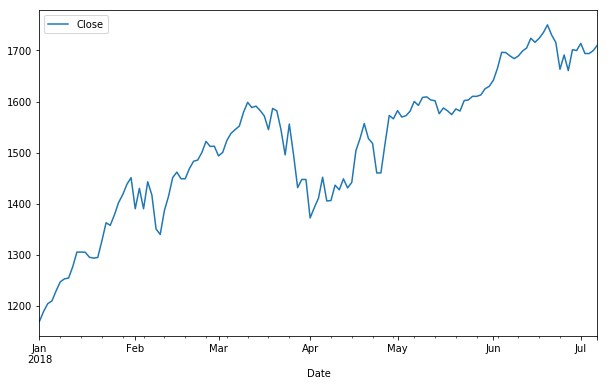

In [33]:
pandaclose.plot(figsize=(10, 6));

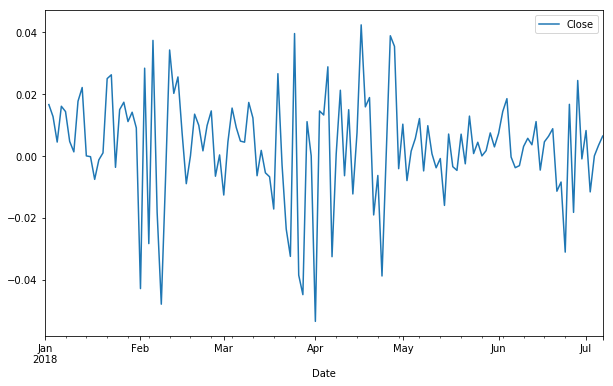

In [34]:
log_returns.plot(figsize = (10, 6))

In [35]:
u = log_returns.mean()
u

Close    0.002838
dtype: float64

In [36]:
var = log_returns.var()
var

Close    0.000303
dtype: float64

In [37]:
drift = u - (0.5 * var)
drift

Close    0.002687
dtype: float64

In [38]:
stdev = log_returns.std()
stdev

Close    0.017401
dtype: float64

In [39]:
type(drift)

pandas.core.series.Series

In [40]:
type(stdev)

pandas.core.series.Series

In [41]:
np.array(drift)

array([ 0.00268675])

In [42]:
drift.values

array([ 0.00268675])

In [43]:
stdev.values

array([ 0.01740068])

In [44]:
norm.ppf(0.999)

3.0902323061678132

In [45]:
x = np.random.rand(10, 2)
x

array([[ 0.1049839 ,  0.81320621],
       [ 0.58790592,  0.83002885],
       [ 0.13777808,  0.3504686 ],
       [ 0.14695026,  0.54294239],
       [ 0.36016114,  0.01683885],
       [ 0.15595486,  0.04244455],
       [ 0.19513819,  0.30450125],
       [ 0.7230824 ,  0.77509978],
       [ 0.64048505,  0.97272931],
       [ 0.91555098,  0.24154233]])

In [46]:
norm.ppf(x)

array([[-1.25365397,  0.88977338],
       [ 0.2221615 ,  0.95427926],
       [-1.09035643, -0.38405565],
       [-1.04960335,  0.10784933],
       [-0.35802812, -2.12390972],
       [-1.01122298, -1.72299682],
       [-0.85911625, -0.51149785],
       [ 0.59202299,  0.75574776],
       [ 0.3597556 ,  1.92251186],
       [ 1.37575322, -0.70134994]])

In [47]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.09407712,  0.27753532],
       [-0.67991544,  0.10633551],
       [ 0.92893224, -0.09177613],
       [-0.63434033, -0.20225078],
       [-0.76692848,  0.13904814],
       [-0.49983524, -1.8016851 ],
       [ 1.59736251, -0.81253229],
       [ 0.09241889, -0.68561101],
       [-1.37950134, -0.30885595],
       [ 0.86714265, -0.17729336]])

In [703]:
t_intervals = 360
iterations = 5

In [704]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [705]:
S0 = pandaclose.iloc[-1]
S0

Close    1710.63
Name: 2018-07-06 00:00:00, dtype: float64

In [706]:
price_list = np.zeros_like(daily_returns)

In [707]:
price_list[0] = S0

In [708]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [709]:
price_list

array([[ 1710.63      ,  1710.63      ,  1710.63      ,  1710.63      ,
         1710.63      ],
       [ 1729.47151424,  1706.46277068,  1744.37233066,  1735.13246981,
         1681.24554318],
       [ 1713.99884297,  1733.07180501,  1759.18465592,  1710.98672126,
         1712.39558471],
       ..., 
       [ 6176.74184094,  3828.14262144,  2390.89500174,  5332.36923161,
         8099.93378375],
       [ 6249.51869629,  3776.5563681 ,  2400.7252983 ,  5341.1586089 ,
         8078.6203439 ],
       [ 6323.27872653,  3782.49877319,  2392.60746385,  5280.8582433 ,
         8175.89041702]])

In [710]:
price_list[:,0]

array([ 1710.63      ,  1729.47151424,  1713.99884297,  1746.06362253,
        1770.32838458,  1798.80627668,  1821.16047061,  1850.15146259,
        1829.42366906,  1830.12070666,  1801.76179668,  1804.67303874,
        1826.28049236,  1863.15198502,  1869.05863629,  1892.05934139,
        1929.09615258,  1900.10047547,  1878.9559481 ,  1879.27349521,
        1868.89247082,  1850.58615825,  1874.89712974,  1884.28352011,
        1860.65773589,  1878.9539482 ,  1899.02508325,  1939.32277776,
        1965.45667115,  1978.30087175,  2001.63157642,  2004.89441223,
        2029.29349796,  2036.80134499,  1975.59676896,  1933.44086863,
        2004.18937558,  1957.29739487,  1943.29144641,  1955.9005238 ,
        1930.34502195,  1928.33041557,  1913.67598917,  1965.71600531,
        1900.96497128,  1886.05173274,  1929.27632034,  1882.24958613,
        1899.49624326,  1904.91478189,  1908.94444553,  1928.90454452,
        1919.20682781,  1860.18455664,  1889.21831887,  1855.97807384,
      

In [711]:
dnp=np.array(pandaclose)

In [712]:
len(dnp)

135

In [713]:
t=np.linspace(-134,0,135)

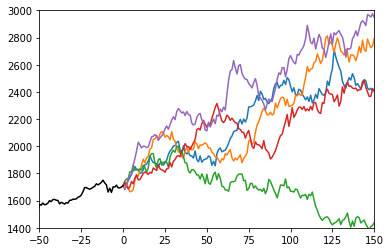

In [714]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlim(-50,150)
plt.ylim(1400,3000)
ax.plot(price_list);
ax.plot(t,dnp, color  = "k");

In [722]:
trecta=np.linspace(0,90,100)
def recta(t):
    return 9.1667*t + 1725
def recta_inf(t):
    return -3.1667*t + 1725

In [723]:
def yinf(x,y,n,xini,xfin,yini,yfin):
    j=0
    count=0
    for i in range(n):
        if (y[i]>yini>y[j]) or (y[i]<yini<y[j]):
                if xini <x[j]<xfin:
                    count += 1
        j = i
    return count

def ysup(x,y,n,xini,xfin,yini,yfin):
    j=0
    count=0
    for i in range(n):
        if (y[i]>yfin>y[j]) or (y[i]<yfin<y[j]):
                if xini <x[j]<xfin:
                    count += 1
        j = i
    return count

Cruces con Umbral Inf de la prediccion 0 = 2
Cruces con Umbral Sup de la prediccion 0 = 0
Cruces con Umbral Inf de la prediccion 1 = 3
Cruces con Umbral Sup de la prediccion 1 = 0
Cruces con Umbral Inf de la prediccion 2 = 22
Cruces con Umbral Sup de la prediccion 2 = 4
Cruces con Umbral Inf de la prediccion 3 = 4
Cruces con Umbral Sup de la prediccion 3 = 0
Cruces con Umbral Inf de la prediccion 4 = 1
Cruces con Umbral Sup de la prediccion 4 = 0


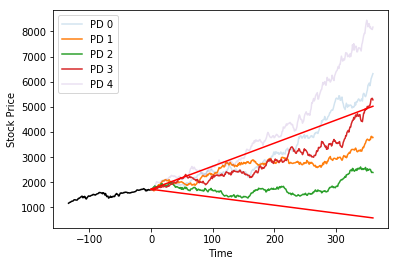

In [725]:
yn = np.linspace(0,360,360)
min = 2
plt.plot(t,dnp, color  = "k");
for i in range(0,5):
    print("Cruces con Umbral Inf de la prediccion %s"%i, "= %s"%ysup(yn,price_list[:,i],360,0,360,1400,1725))
    print("Cruces con Umbral Sup de la prediccion %s"%i, "= %s"%yinf(yn,price_list[:,i],360,0,360,1400,1725))
    if(ysup(yn,price_list[:,i],360,0,360,1400,1725) > lim or yinf(yn,price_list[:,i],360,0,360,1400,1725) > lim ):
        plt.plot(yn,price_list[:,i],label = "PD %s"%i)  
        
    elif(ysup(yn,price_list[:,i],360,0,360,1400,1725) < lim or yinf(yn,price_list[:,i],360,0,360,1400,1725) < lim ): 
         plt.plot(yn,price_list[:,i], alpha = .2, label = "PD %s"%i)   
plt.plot(yn,recta(yn), color  = "r");
plt.plot(yn,recta_inf(yn), color  = "r");
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

2

0

NameError: name 'count' is not defined